<a href="https://colab.research.google.com/github/mvgarcia/GarciaValentina_RECV_Entrega2/blob/main/GarciaValentina_RECV_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Imports** 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import corner
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [47]:
#--- Leer los datos
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cars93.csv')
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [7]:
#--- Observamos la cabecera del dataset

data.head(5)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


Hipótesis: Las dos variables más importantes son el "Manufacturer" y "EngineSize" o "Horsepower"

In [8]:
#--- Verificamos si existen celdas vacias
data.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

Hay celdas vacías, pero no son las variables que vamos a usar, no es necesario completarlas

In [16]:
#--- Seleccionamos algunas features y el objetivo

keys = ['Manufacturer','EngineSize','Horsepower']
y = 'Price'

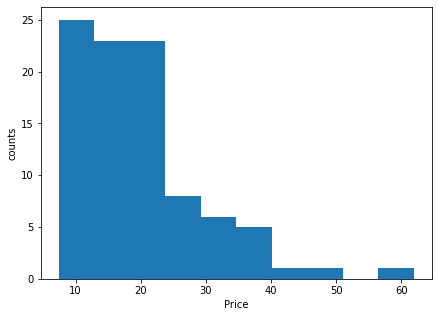

In [11]:
#--- Visualizando el objetivo
fig = plt.figure(figsize=(7,5))
plt.hist(data[y])
plt.xlabel(y)
plt.ylabel('counts')
plt.show()

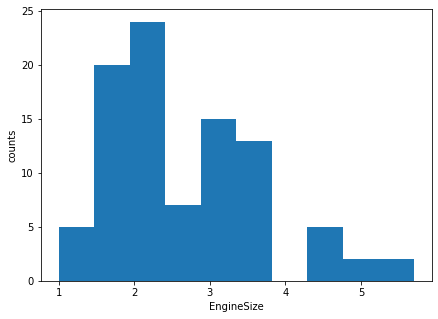

In [13]:
#--- Visualizando algunos datos
fig = plt.figure(figsize=(7,5))
plt.hist(data['EngineSize'])
plt.xlabel('EngineSize')
plt.ylabel('counts')
plt.show()

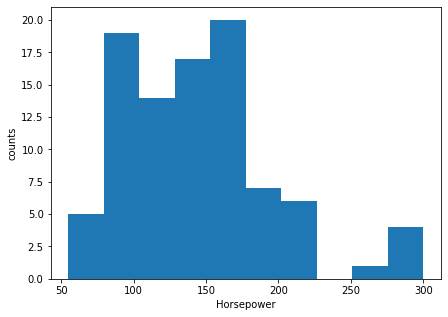

In [14]:
#--- Visualizando algunos datos
fig = plt.figure(figsize=(7,5))
plt.hist(data['Horsepower'])
plt.xlabel('Horsepower')
plt.ylabel('counts')
plt.show()

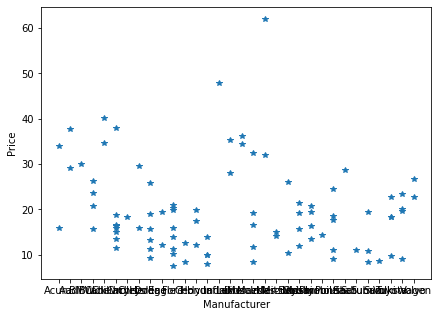

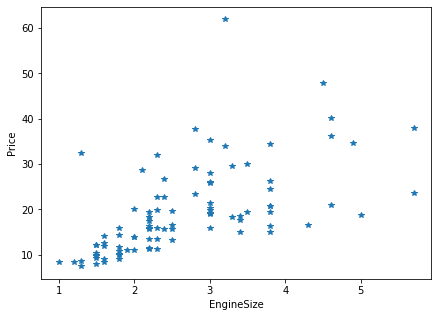

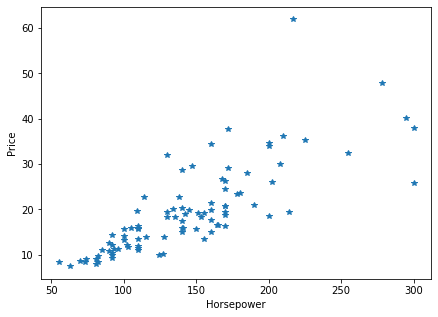

In [17]:
#--- Clasificación Visual
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],data[y],'*')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

(array([0, 1]), array([80, 13]))


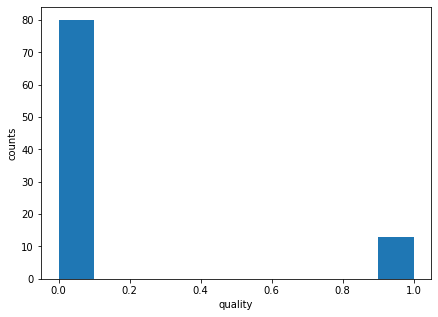

In [19]:
#--- Definición de precio bajo(<30) y alto(>=30)
Y = np.array(data[y], dtype=int)
np.unique(Y,return_counts=True)

Y[Y<30] = 0 #Bajo
Y[Y>=30] = 1 #Alto

print(np.unique(Y,return_counts=True))

fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.ylabel('counts')
plt.xlabel('quality')
plt.show()

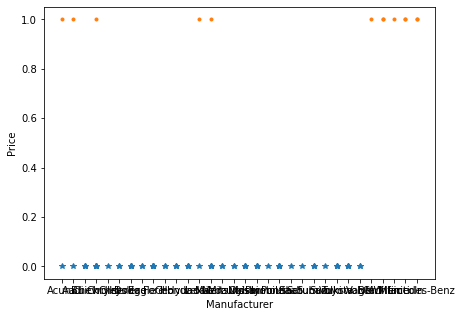

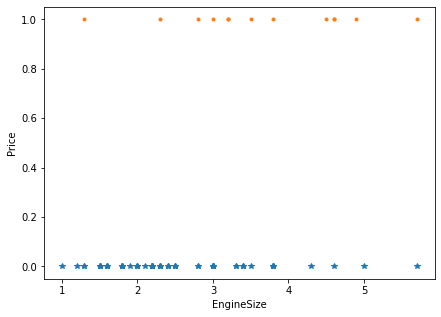

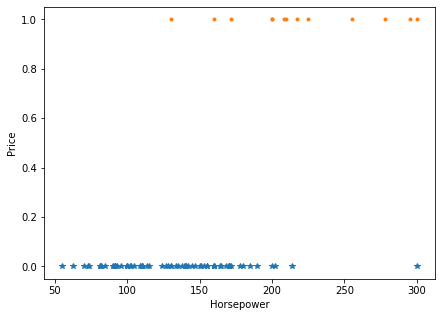

In [20]:
#--- Clasificación Visual pt.2
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k][Y==0],Y[Y==0],'*')
  plt.plot(data[k][Y==1],Y[Y==1],'.')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

Las variables parecen funcionar dado que las lineas no se sobrelapan completamente. La variable más prometedora parece ser los caballos de fuerza seguido del fabricante.

In [48]:
#--- Redefinición de variable tipo String a numérica

manufacturer=np.unique(data['Manufacturer'],return_counts=True)[0]

#np.unique(data['Manufacturer'],return_counts=True)
manufacturer_2=data['Manufacturer']
for i,man in enumerate(manufacturer):
  manufacturer_2[manufacturer_2==man]=i
  print(i,man)



0 Acura
1 Audi
2 BMW
3 Buick
4 Cadillac
5 Chevrolet
6 Chrylser
7 Chrysler
8 Dodge
9 Eagle
10 Ford
11 Geo
12 Honda
13 Hyundai
14 Infiniti
15 Lexus
16 Lincoln
17 Mazda
18 Mercedes-Benz
19 Mercury
20 Mitsubishi
21 Nissan
22 Oldsmobile
23 Plymouth
24 Pontiac
25 Saab
26 Saturn
27 Subaru
28 Suzuki
29 Toyota
30 Volkswagen
31 Volvo


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


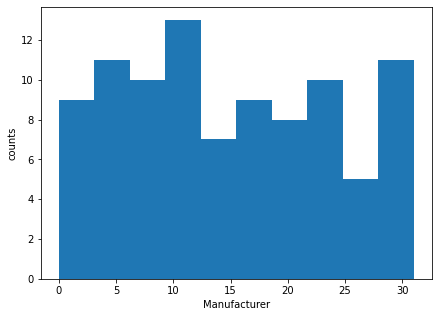

In [46]:
#--- Visualizando algunos datos
fig = plt.figure(figsize=(7,5))
plt.hist(data['Manufacturer'])
plt.xlabel('Manufacturer')
plt.ylabel('counts')
plt.show()

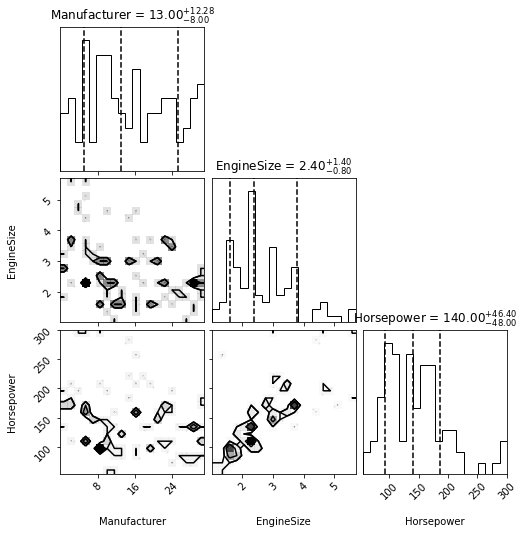

In [49]:
figure = corner.corner(data[keys], labels=keys,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})


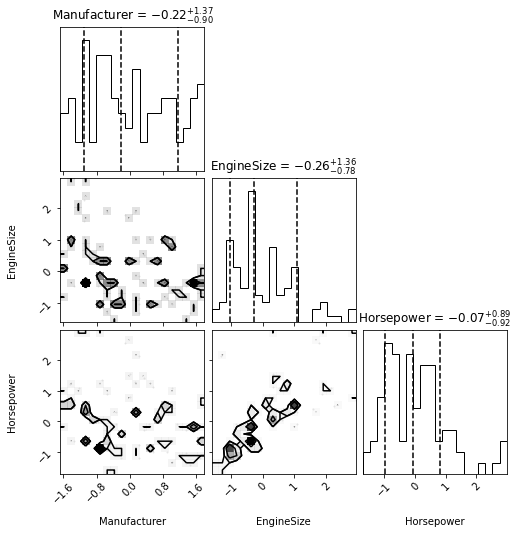

In [50]:
#--- Reescalamos
data_scaled = StandardScaler().fit_transform(data[keys])
figure = corner.corner(data_scaled, labels=keys,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

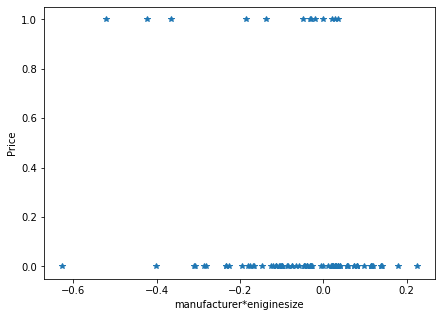

In [53]:
#--- Probando algunas combinaciones lineales
fig = plt.figure(figsize=(7,5))
plt.plot( (0.8*data_scaled[:,0]*0.2*data_scaled[:,1]) ,Y,'*')
plt.xlabel('manufacturer*eniginesize')
plt.ylabel(y)
plt.show()

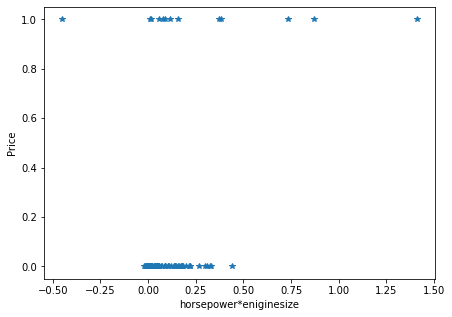

In [54]:
#--- Probando algunas combinaciones lineales
fig = plt.figure(figsize=(7,5))
plt.plot( (0.8*data_scaled[:,1]*0.2*data_scaled[:,2]) ,Y,'*')
plt.xlabel('horsepower*eniginesize')
plt.ylabel(y)
plt.show()

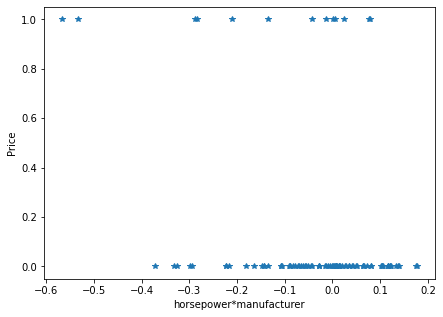

In [55]:
#--- Probando algunas combinaciones lineales
fig = plt.figure(figsize=(7,5))
plt.plot( (0.8*data_scaled[:,0]*0.2*data_scaled[:,2]) ,Y,'*')
plt.xlabel('horsepower*manufacturer')
plt.ylabel(y)
plt.show()

In [56]:
#--- Cargamos el método para crear un modelo de Bosque Aleatorio

model = RandomForestClassifier(n_estimators=100, max_depth=10)

X_train, X_test, Y_train, Y_test = train_test_split(np.array(data[keys]),Y)

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

In [57]:
#--- Calculamos la precisión
acc = sum(Y_pred == Y_test)/len(Y_test)
acc

0.875

Tenemos un accuracy de 0.875, lo que es bastante bueno

In [58]:
#--- Calculamos la importancia de los parametros
importances = model.feature_importances_
importances

array([0.2952524 , 0.27731917, 0.42742843])

In [62]:
#--- Organizamos los parametros de menor a mayor

keys2=np.array(data.keys())
ii = np.argsort(importances)[::-1]
np.array(keys)[ii]

array(['Horsepower', 'Manufacturer', 'EngineSize'], dtype='<U12')

De los parámetros seleccionados, 'Horsepower', 'Manufacturer' fueron los más importantes